In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/IBM ASSESMENT/flowers/Training',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 4267 images belonging to 5 classes.


In [15]:
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/IBM ASSESMENT/flowers/Testing',target_size=(64,64),class_mode='categorical',batch_size=5)

Found 50 images belonging to 5 classes.


In [16]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [17]:
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Dense

In [18]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [19]:
model=Sequential()

In [20]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [22]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
model.add(Flatten())

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [29]:
model.add(Dense(5,activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
len(x_train)

43

In [32]:
len(x_test)

10

In [33]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
43/43 [==============================] - 663s 15s/step - loss: 1.4863 - accuracy: 0.3201 - val_loss: 1.3682 - val_accuracy: 0.5600
Epoch 2/10
43/43 [==============================] - 21s 483ms/step - loss: 1.4186 - accuracy: 0.3853 - val_loss: 1.3711 - val_accuracy: 0.4000
Epoch 3/10
43/43 [==============================] - 21s 474ms/step - loss: 1.3946 - accuracy: 0.4169 - val_loss: 1.3048 - val_accuracy: 0.4800
Epoch 4/10
43/43 [==============================] - 22s 500ms/step - loss: 1.3579 - accuracy: 0.4488 - val_loss: 1.3035 - val_accuracy: 0.5200
Epoch 5/10
43/43 [==============================] - 21s 487ms/step - loss: 1.3267 - accuracy: 0.4614 - val_loss: 1.2779 - val_accuracy: 0.5400
Epoch 6/10
43/43 [==============================] - 21s 476ms/step - loss: 1.3081 - accuracy: 0.5088 - val_loss: 1.2908 - val_accuracy: 0.5400
Epoch 7/10
43/43 [==============================] - 22s 498ms/step - loss: 1.3030 - accuracy: 0.5004 - val_loss: 1.2664 - val_accuracy: 0.4600


In [41]:
model.save('flowers.h5')

In [44]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [45]:
model=load_model('flowers.h5')

In [50]:
img=image.load_img(r'/content/drive/MyDrive/IBM ASSESMENT/flowers/Training/daisy/10555815624_dc211569b0.jpg')

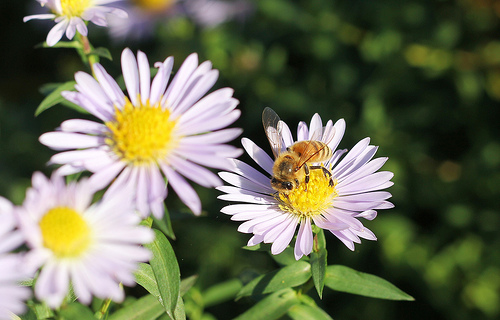

In [51]:
img

In [52]:
img=image.load_img(r'/content/drive/MyDrive/IBM ASSESMENT/flowers/Training/daisy/10555815624_dc211569b0.jpg',target_size=(64,64))

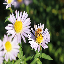

In [53]:
img

In [54]:
x=image.img_to_array(img)
x

array([[[ 10.,  15.,   8.],
        [ 12.,  17.,  10.],
        [ 15.,  20.,  13.],
        ...,
        [ 68.,  56.,  16.],
        [ 60.,  49.,  21.],
        [ 60.,  47.,  15.]],

       [[ 10.,  11.,   5.],
        [ 12.,  15.,   8.],
        [ 12.,  19.,  11.],
        ...,
        [ 70.,  61.,  22.],
        [ 59.,  53.,  19.],
        [ 66.,  51.,  18.]],

       [[  8.,  11.,   4.],
        [ 10.,  13.,   6.],
        [ 13.,  18.,  11.],
        ...,
        [ 53.,  64.,  22.],
        [ 54.,  54.,  20.],
        [ 56.,  51.,  21.]],

       ...,

       [[225., 212., 229.],
        [223., 212., 228.],
        [203., 195., 210.],
        ...,
        [ 60.,  81.,  25.],
        [ 82., 105.,  33.],
        [ 63.,  79.,  30.]],

       [[220., 207., 227.],
        [226., 217., 212.],
        [171., 158., 167.],
        ...,
        [ 21.,  32.,  15.],
        [ 52.,  73.,  30.],
        [ 38.,  58.,  23.]],

       [[212., 201., 217.],
        [224., 220., 208.],
        [160., 1

In [55]:
x=np.expand_dims(x,axis=0)
x

array([[[[ 10.,  15.,   8.],
         [ 12.,  17.,  10.],
         [ 15.,  20.,  13.],
         ...,
         [ 68.,  56.,  16.],
         [ 60.,  49.,  21.],
         [ 60.,  47.,  15.]],

        [[ 10.,  11.,   5.],
         [ 12.,  15.,   8.],
         [ 12.,  19.,  11.],
         ...,
         [ 70.,  61.,  22.],
         [ 59.,  53.,  19.],
         [ 66.,  51.,  18.]],

        [[  8.,  11.,   4.],
         [ 10.,  13.,   6.],
         [ 13.,  18.,  11.],
         ...,
         [ 53.,  64.,  22.],
         [ 54.,  54.,  20.],
         [ 56.,  51.,  21.]],

        ...,

        [[225., 212., 229.],
         [223., 212., 228.],
         [203., 195., 210.],
         ...,
         [ 60.,  81.,  25.],
         [ 82., 105.,  33.],
         [ 63.,  79.,  30.]],

        [[220., 207., 227.],
         [226., 217., 212.],
         [171., 158., 167.],
         ...,
         [ 21.,  32.,  15.],
         [ 52.,  73.,  30.],
         [ 38.,  58.,  23.]],

        [[212., 201., 217.],
       

In [56]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 80ms/step


array([1])

In [57]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}